In [1]:
import pandas as pd
import pyarrow.parquet as pq

## Create filtered dataframe

Create filtered dataframe of only the sport category

In [2]:
import pyarrow.parquet as pq

parquet_file_path = "yt_metadata_en.parquet"

pq_metadata = pq.ParquetFile(parquet_file_path)

# Initialize an empty DataFrame to store the filtered data
filtered_df = pd.DataFrame()

# Iterate through the batches and filter the necessary columns
for batch in pq_metadata.iter_batches(batch_size=1_000_000):
    temp_df = batch.to_pandas().drop(columns=['description'])

    temp_df = temp_df[temp_df['categories'].apply(
        lambda x: 'News & Politics' in x)]
    filtered_df = pd.concat([filtered_df, temp_df], ignore_index=True)
    print(f"Current size of filtered_df: {filtered_df.shape}")
    print(f"Memory usage of filtered_df: {filtered_df.memory_usage(deep=True).sum() / (1024 ** 2):.2f} MB")

Current size of filtered_df: (145768, 11)
Memory usage of filtered_df: 110.53 MB
Current size of filtered_df: (205029, 11)
Memory usage of filtered_df: 153.53 MB
Current size of filtered_df: (373385, 11)
Memory usage of filtered_df: 278.72 MB
Current size of filtered_df: (452128, 11)
Memory usage of filtered_df: 333.51 MB
Current size of filtered_df: (613260, 11)
Memory usage of filtered_df: 441.33 MB
Current size of filtered_df: (722611, 11)
Memory usage of filtered_df: 527.74 MB
Current size of filtered_df: (834361, 11)
Memory usage of filtered_df: 612.23 MB
Current size of filtered_df: (927670, 11)
Memory usage of filtered_df: 677.99 MB
Current size of filtered_df: (1037661, 11)
Memory usage of filtered_df: 768.40 MB
Current size of filtered_df: (1134841, 11)
Memory usage of filtered_df: 833.71 MB
Current size of filtered_df: (1237960, 11)
Memory usage of filtered_df: 913.63 MB
Current size of filtered_df: (1284069, 11)
Memory usage of filtered_df: 950.17 MB
Current size of filtered

In [5]:
filtered_df

,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,News & Politics,UCzWm1-4XF7AHxVUTkHCM1uw,2019-11-17 06:28:42.593675,16.0,dfa8RRkKoa4,9251,25.0,"RetroGamer3,Live Stream,politics,Trump",Retrogamer3 Political Stream,2018-08-23 00:00:00,478.0
1,News & Politics,UCzWLsxDD373D4tY8kN-0LGQ,2019-11-05 00:42:33.012228,0.0,_dIIEMvH86k,309,9.0,"NWO,Ebola,Ukraine,Mainstream,Media,Pyschology",Adam Curtis describes the Surkow Strategy of M...,2015-01-04 00:00:00,865.0
2,News & Politics,UCzVBu6oqlrAix0oq9T2rBFg,2019-11-19 20:40:22.403775,89.0,eWXefhNB2po,707,625.0,"michael jackson,lyrics,music video,court,child...",my thoughts on the michael jackson documentary.,2019-04-24 00:00:00,12780.0
3,News & Politics,UCzUV5283-l5c0oKRtyenj6Q,2019-11-22 08:47:10.520209,195.0,MBgzne7djFU,378,47027.0,"Funny,Entertainment,Fun,Laughing,Educational,L...",Elizabeth Warren Gets a Big Surprise at the Ai...,2019-10-03 00:00:00,374711.0
4,News & Politics,UCzUV5283-l5c0oKRtyenj6Q,2019-11-22 08:46:16.481889,114.0,AbH3pJnFgY8,278,36384.0,"Funny,Entertainment,Fun,Laughing,Educational,L...",No More Twitter? 😂,2019-10-02 00:00:00,245617.0
...,...,...,...,...,...,...,...,...,...,...,...
8881017,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:46:02.294620,3.0,YQLoxwLpjSU,270,67.0,"BJP,Bharatiya Janata Party,BJP videos,Yuva TV,...",Shri Manoj Kumar Tiwari's speech during Motion...,2017-02-06 00:00:00,4409.0
8881018,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:46:06.401481,0.0,mINQHg1QBcg,878,21.0,"BJP,Bharatiya Janata Party,BJP videos,Yuva TV,...",Shri La Ganesan's speech during Motion of Than...,2017-02-06 00:00:00,1172.0
8881019,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:46:09.530822,2.0,x20aNOWh1yI,1003,35.0,"BJP,Bharatiya Janata Party,BJP videos,Yuva TV,...",Shri Mukhtar Abbas Naqvi's speech during Motio...,2017-02-06 00:00:00,1898.0
8881020,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:46:00.080054,0.0,-Nn6FL2gqEw,755,27.0,"BJP,Bharatiya Janata Party,BJP videos,Yuva TV,...",BJP submitted complaint to EC against Chief Se...,2017-02-06 00:00:00,726.0


### Save file

In [6]:
filtered_df.to_parquet("filtered_news_category_without_description_column_metadata.parquet", engine="fastparquet")

### Read file

In [ ]:
filtered_df = pd.read_parquet("filtered_news_category_without_description_column_metadata.parquet", engine="fastparquet")

## Analysis

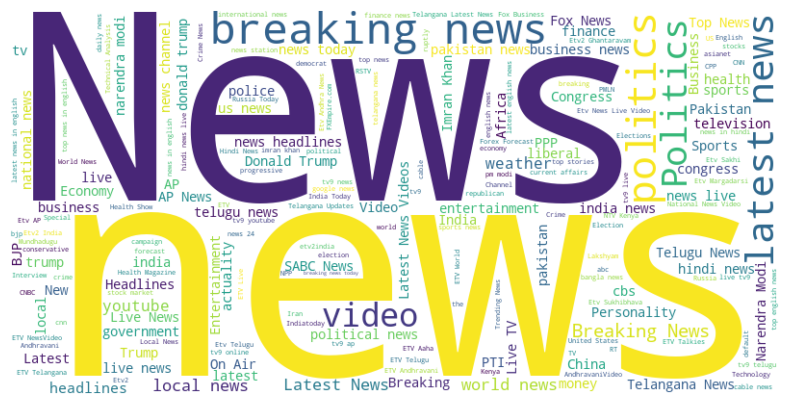

In [7]:
from collections import Counter
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Extract tags and split them into individual tags

# Combine all tags into a single list
all_tags = [tag for sublist in filtered_df['tags'].str.split(',').tolist() for tag in sublist]

# Count the frequency of each tag
tag_counts = Counter(all_tags)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

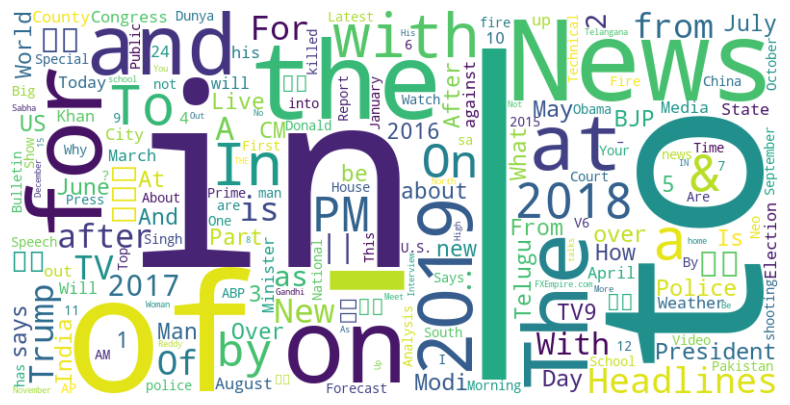

In [8]:
all_titles = [title for title in filtered_df['title'].str.split(' ').tolist() for title in title]

# Count the frequency of each tag
tag_counts = Counter(all_titles)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
filtered_df['upload_date'] = pd.to_datetime(filtered_df['upload_date'])
filtered_df['year'] = filtered_df['upload_date'].dt.year
filtered_df["month"] = filtered_df["upload_date"].dt.month
filtered_df['day'] = filtered_df['upload_date'].dt.day

/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_

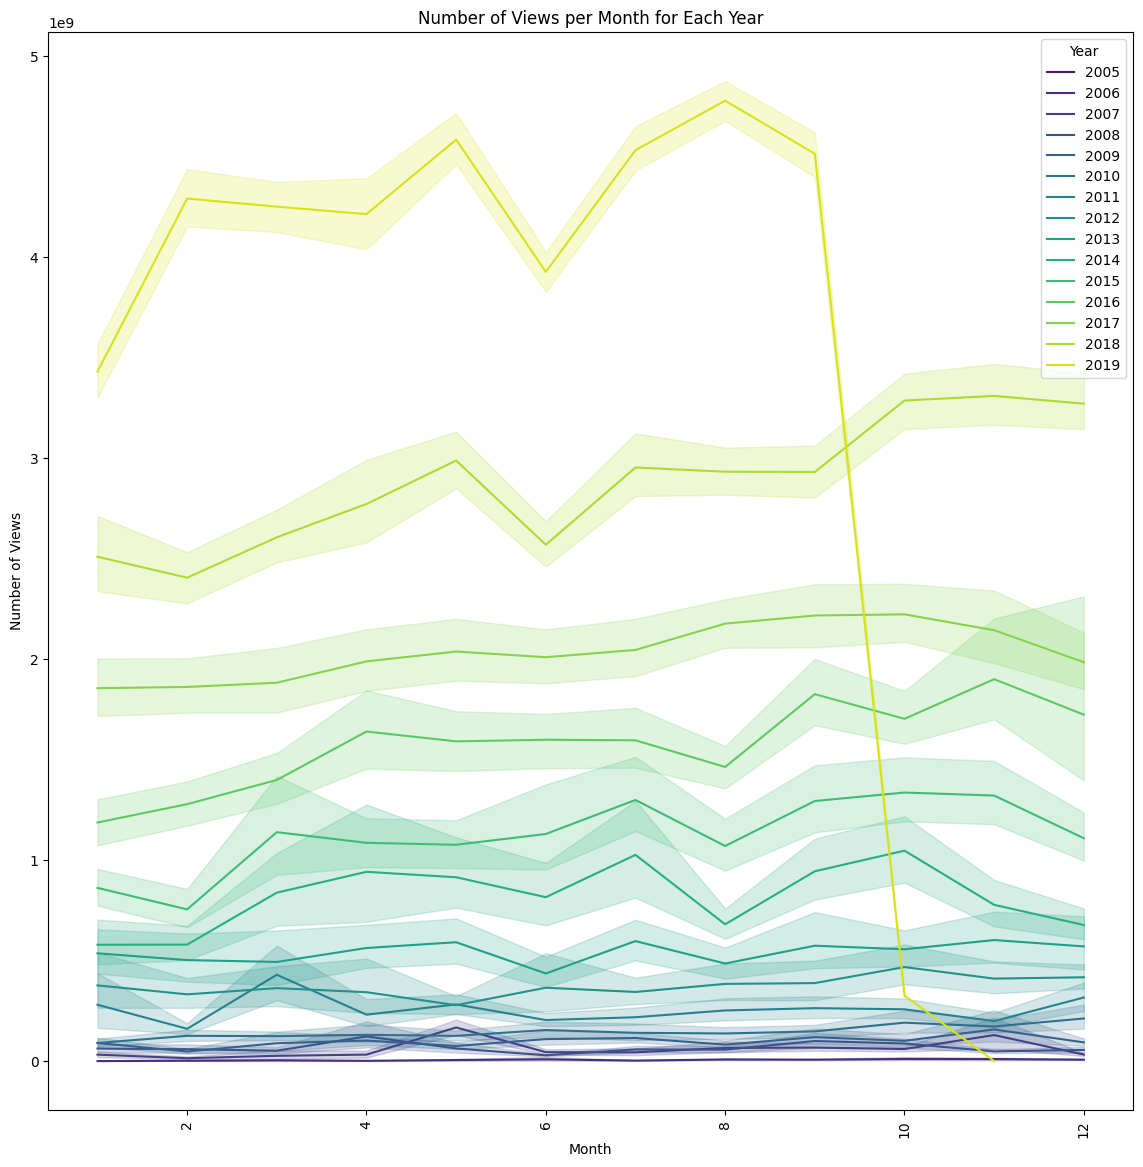

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the 'year' column to a categorical type
filtered_df['year'] = filtered_df['year'].astype('category')

# Set the figure size
plt.figure(figsize=(14, 14))

# Plot the number of views per day for each year
sns.lineplot(data=filtered_df, x='month', y='view_count', hue='year', palette='viridis', estimator='sum')
plt.title('Number of Views per Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Number of Views')
plt.legend(title='Year')
plt.xticks(rotation=90)
plt.show()
